In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

%matplotlib inline

import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

print(os.listdir("../input"))

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

['datasets']


In [2]:
path = "../input/datasets/datasets/flowers17/images/"

In [3]:
dirs = os.listdir(path)

In [4]:
label_dict = {
    'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8,
    'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16,
    
}

In [5]:
size = 200,200

def load_dataset(path):
    image_data = list()
    labels = list()
    dirs = os.listdir(path)
    print("Loading images for: ", end =" ")
    for Dir in dirs:
        print("{} |".format(Dir), end=" ")
        path_img = path+'/'+Dir
        images = os.listdir(path_img)
        for image in images:
            temp_img = cv2.imread(path_img+'/'+image)
            temp_img = cv2.resize(temp_img, size)
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
            image_data.append(temp_img)
            labels.append(label_dict[Dir])
    
    image_data = np.array(image_data)
    labels = to_categorical(labels)
    
    image_data, labels = shuffle(image_data, labels, random_state=1)

    X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.25)
    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = load_dataset(path)

Loading images for:  snowdrop | daffodil | fritillary | crocus | bluebell | windflower | coltsfoot | pansy | iris | dandelion | daisy | cowslip | lilyvalley | buttercup | sunflower | tulip | tigerlily | 

In [7]:
print("Shape of X_train: ", X_train.shape)
print("shape of y_train/labels: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("shape of y_test/labels: ", y_test.shape)

Shape of X_train:  (1020, 200, 200, 3)
shape of y_train/labels:  (1020, 17)
Shape of X_test:  (340, 200, 200, 3)
shape of y_test/labels:  (340, 17)


In [8]:
samples = np.random.choice(len(X_train), 8)

In [9]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title, fontsize=50)
        a.grid(False)
        a.axis("off")
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()
    

In [10]:
sample_images = []
sample_labels = []
for sample in samples:
    sample_images.append(X_train[sample])
    for key, val in label_dict.items():
        if np.argmax(y_train[sample]) == val:
            sample_labels.append(key)

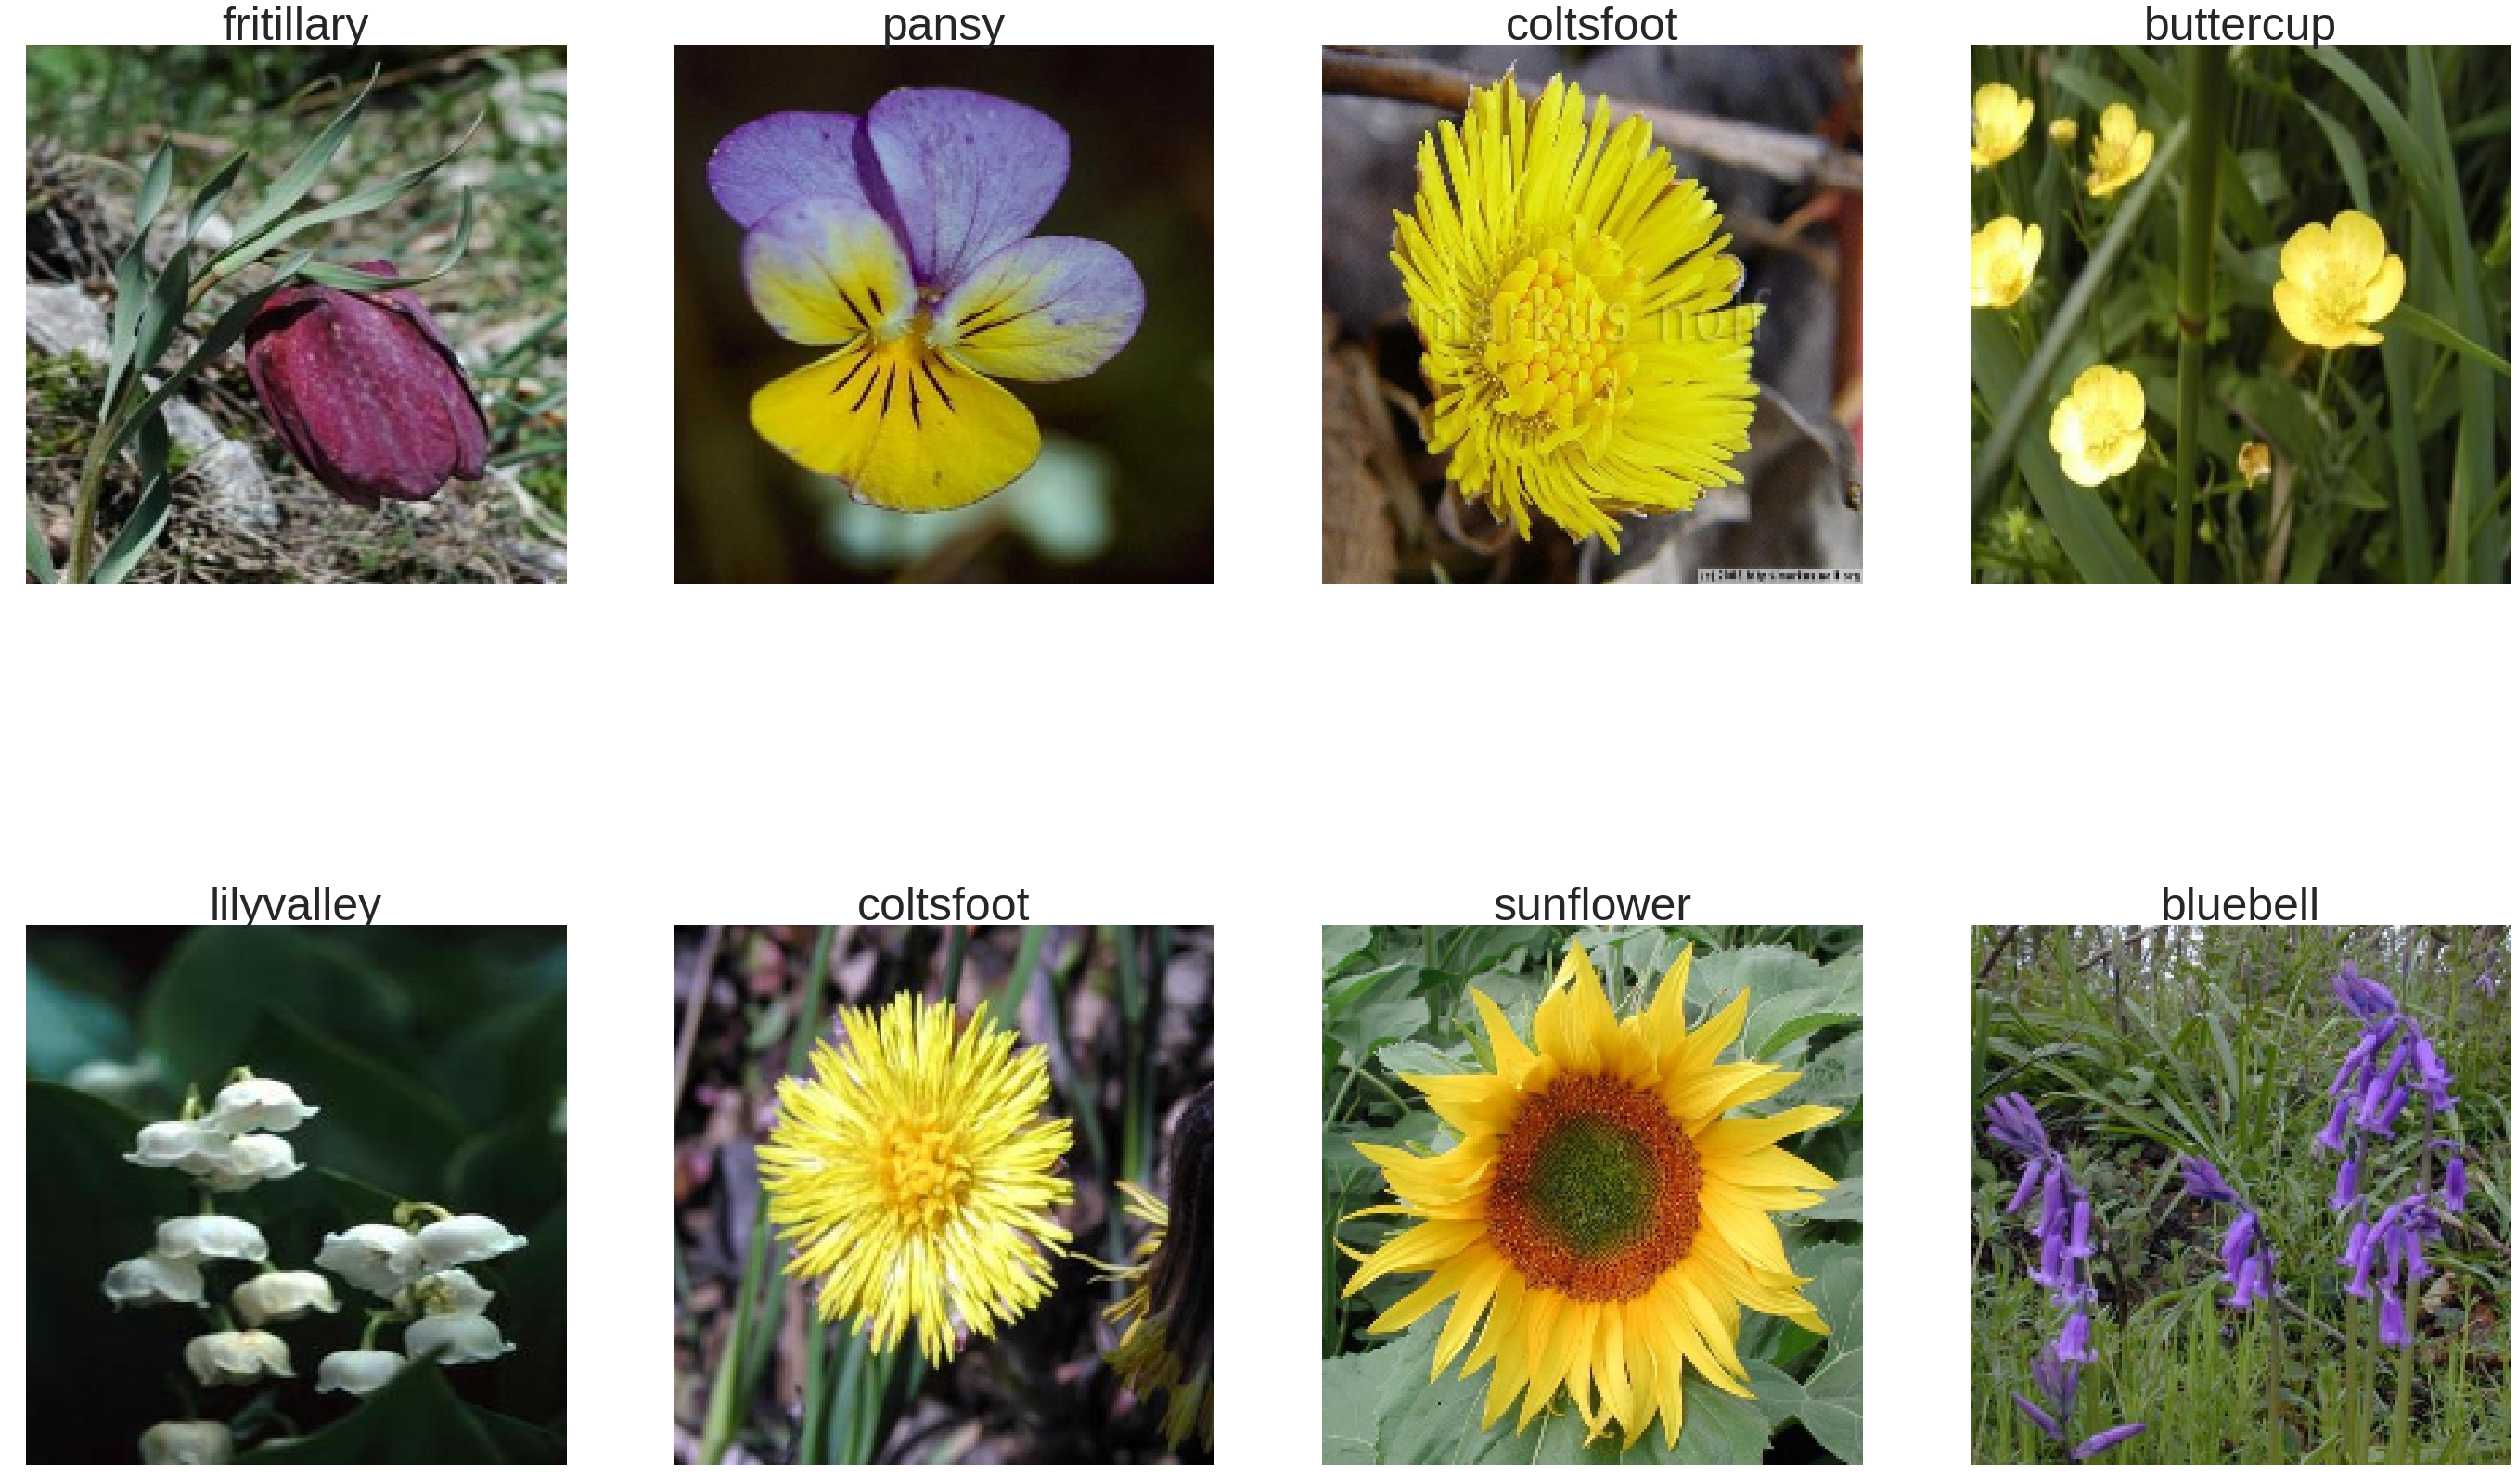

In [11]:
show_images(sample_images, 2, titles=sample_labels)